Exploring Citywide Payroll Data (Fiscal Year) - Wenkai Tan 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
sns.set()
%matplotlib inline

# Load, and explore the data set

In [2]:
df = pd.read_csv("./Data/Citywide_Payroll_Data__Fiscal_Year_.csv")
df.head()
original_df = df

/Users/wenkaitan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
print(df.shape)
df.info()

(4496767, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4496767 entries, 0 to 4496766
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Fiscal Year                 int64  
 1   Payroll Number              float64
 2   Agency Name                 object 
 3   Last Name                   object 
 4   First Name                  object 
 5   Mid Init                    object 
 6   Agency Start Date           object 
 7   Work Location Borough       object 
 8   Title Description           object 
 9   Leave Status as of June 30  object 
 10  Base Salary                 float64
 11  Pay Basis                   object 
 12  Regular Hours               float64
 13  Regular Gross Paid          float64
 14  OT Hours                    float64
 15  Total OT Paid               float64
 16  Total Other Pay             float64
dtypes: float64(7), int64(1), object(9)
memory usage: 583.2+ MB


In [4]:
df["Agency Start Date"] = pd.to_datetime(df["Agency Start Date"], errors = 'coerce')

# Handle missing data 

Display the number of missing values in each column.

In [5]:
df.isnull().sum().sort_values(ascending=False)

Mid Init                      1835833
Payroll Number                1745440
Work Location Borough          506229
First Name                       6661
Last Name                        6632
Agency Start Date                 478
Title Description                  88
Agency Name                         0
Total Other Pay                     0
Total OT Paid                       0
Leave Status as of June 30          0
Base Salary                         0
Pay Basis                           0
Regular Hours                       0
Regular Gross Paid                  0
OT Hours                            0
Fiscal Year                         0
dtype: int64

In [6]:
df = df.dropna()
print(df.shape)
df.head()


(1356251, 17)


,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,2016-09-12,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00
3,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,2013-09-16,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00
4,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,2018-04-30,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00
5,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,WASHINGTON,MORIAH,A,2019-03-18,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,87900.95,0.0,0.0,-3202.74
7,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,KRAWCZYK,AMANDA,N,2017-05-15,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,83976.54,0.0,0.0,0.00


In [7]:
#sanity check
df.isnull().sum()

Fiscal Year                   0
Payroll Number                0
Agency Name                   0
Last Name                     0
First Name                    0
Mid Init                      0
Agency Start Date             0
Work Location Borough         0
Title Description             0
Leave Status as of June 30    0
Base Salary                   0
Pay Basis                     0
Regular Hours                 0
Regular Gross Paid            0
OT Hours                      0
Total OT Paid                 0
Total Other Pay               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df["starting_year"] = df["Agency Start Date"].dt.year
df.head()

<ipython-input-9-d61e91be534e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["starting_year"] = df["Agency Start Date"].dt.year


,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,starting_year
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,2016-09-12,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00,2016
3,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,2013-09-16,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00,2013
4,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,2018-04-30,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00,2018
5,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,WASHINGTON,MORIAH,A,2019-03-18,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,87900.95,0.0,0.0,-3202.74,2019
7,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,KRAWCZYK,AMANDA,N,2017-05-15,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,83976.54,0.0,0.0,0.00,2017


# 2. Study Key Features¶
The total number of features seems overwhelming, so let's start with a few features that we know are definitely relevant:
Agency start date, Work Location, Title, Total other paid.

In [10]:
import datetime
now = datetime.datetime.now()
def convertToYears(date):
    return now.year - int(date[-4:])
# for idx in df.index:
df["num_of_years_working"] = now.year - df["starting_year"] 
df = df[df["num_of_years_working"] > 0]
df.head()

<ipython-input-10-e5933576a43a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_of_years_working"] = now.year - df["starting_year"]


,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,starting_year,num_of_years_working
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,2016-09-12,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00,2016,6
3,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,2013-09-16,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00,2013,9
4,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,2018-04-30,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00,2018,4
5,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,WASHINGTON,MORIAH,A,2019-03-18,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,87900.95,0.0,0.0,-3202.74,2019,3
7,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,KRAWCZYK,AMANDA,N,2017-05-15,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,83976.54,0.0,0.0,0.00,2017,5


In [11]:
df["Agency Name"].value_counts()
#DEPT OF ED PEDAGOGICAL is the dept that has the most employees in the city, and there are 153 departments

DEPT OF ED PEDAGOGICAL            278695
DEPT OF ED PER SESSION TEACHER    242948
POLICE DEPARTMENT                 164110
DEPT OF ED PARA PROFESSIONALS      85329
BOARD OF ELECTION POLL WORKERS     68891
                                   ...  
QUEENS COMMUNITY BOARD #14             4
QUEENS COMMUNITY BOARD #6              4
QUEENS COMMUNITY BOARD #4              4
BROOKLYN COMMUNITY BOARD #12           3
DEPARTMENT OF JUVENILE JUSTICE         2
Name: Agency Name, Length: 153, dtype: int64

Text(0.5, 1.0, 'The # of employees trend for each year')

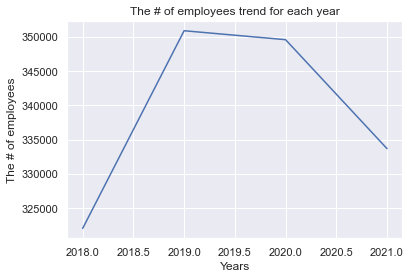

In [12]:
years = df["Fiscal Year"].value_counts().sort_index()
years.plot.line()
plt.xlabel("Years")
plt.ylabel("The # of employees")
plt.title("The # of employees trend for each year")


In [13]:
# we can only focus on 2021 fiscal year, so we will extract 2021
df = df[df["Fiscal Year"] == 2021].reset_index()
print(df.shape)
df.head(10)


(333705, 20)


,index,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,starting_year,num_of_years_working
0,3923290,2021,996.0,NYC HOUSING AUTHORITY,MUSTACIUOLO,VITO,J,2018-02-26,MANHATTAN,EXECUTIVE DIRECTOR,ACTIVE,258000.00,per Annum,1820.0,257260.30,0.00,0.00,258000.00,2018,4
1,3923291,2021,996.0,NYC HOUSING AUTHORITY,RUSS,GREGORY,P,2019-08-12,MANHATTAN,CHAIR,ACTIVE,414707.00,per Annum,1820.0,413518.05,0.00,0.00,500.00,2019,3
2,3923293,2021,816.0,DEPT OF HEALTH/MENTAL HYGIENE,HALLAHAN,PATRICK,M,2018-02-26,BROOKLYN,STATIONARY ENGINEER,ACTIVE,508.80,per Day,2080.0,132288.00,2115.25,218628.18,56616.07,2018,4
3,3923294,2021,816.0,DEPT OF HEALTH/MENTAL HYGIENE,PETTIT,PATRICK,J,2010-08-02,MANHATTAN,STATIONARY ENGINEER,ACTIVE,508.80,per Day,2080.0,132288.00,2152.75,218694.96,38611.82,2010,12
4,3923295,2021,816.0,DEPT OF HEALTH/MENTAL HYGIENE,TELEHANY,STEPHEN,M,2007-01-16,QUEENS,STATIONARY ENGINEER,ACTIVE,508.80,per Day,2080.0,132288.00,1876.25,192296.19,51160.20,2007,15
5,3923296,2021,462.0,GUTTMAN COMMUNITY COLLEGE,EVENBECK,SCOTT,E,2011-04-17,MANHATTAN,PRESIDENT,CEASED,228000.00,per Annum,980.0,122427.81,0.00,0.00,244495.20,2011,11
6,3923300,2021,996.0,NYC HOUSING AUTHORITY,DALEY,GARFIELD,D,1994-05-24,BRONX,SUPERVISOR ELECTRICIAN,ACTIVE,460.25,per Day,1820.0,119469.25,2032.50,200038.56,28316.97,1994,28
7,3923301,2021,816.0,DEPT OF HEALTH/MENTAL HYGIENE,REINHOLD,CHRISTOPHER,M,2019-02-04,BROOKLYN,STATIONARY ENGINEER,ACTIVE,508.80,per Day,2080.0,134832.62,1755.25,172637.44,40184.01,2019,3
8,3923302,2021,816.0,DEPT OF HEALTH/MENTAL HYGIENE,BEHRENS,GREGG,K,2006-07-31,MANHATTAN,STATIONARY ENGINEER,ACTIVE,508.80,per Day,2080.0,132288.00,1689.25,170511.60,35905.23,2006,16
9,3923306,2021,816.0,DEPT OF HEALTH/MENTAL HYGIENE,KELLY,SEAN,C,2004-10-01,BROOKLYN,CITY MEDICAL EXAMINER,ACTIVE,238275.00,per Annum,2080.0,263716.96,159.25,22695.88,39879.43,2004,18


Text(0.5, 1.0, 'The distrbution among the type of pay type')

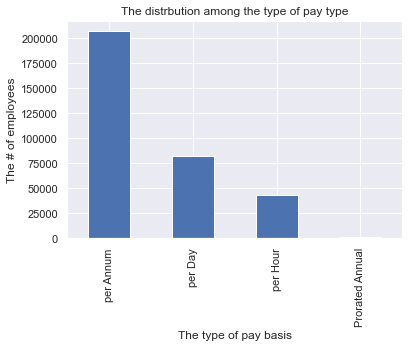

In [14]:
df["Pay Basis"].value_counts().plot.bar()
plt.xlabel("The type of pay basis")
plt.ylabel("The # of employees")
plt.title("The distrbution among the type of pay type")

In [15]:
# sns.lineplot(data=df, x="Agency Start Date", y="Base Salary")

# 2. Study Key Features

In [16]:
key_features = ["Agency Name", "Work Location Borough", "Regular Gross Paid", "num_of_years_working", "OT Hours", "Base Salary", "Regular Hours"]
df = df[key_features]


In [17]:
depts = set(df["Agency Name"].tolist())
depts

{"ADMIN FOR CHILDREN'S SVCS",
 'ADMIN TRIALS AND HEARINGS',
 'BOARD OF CORRECTION',
 'BOARD OF ELECTION',
 'BOARD OF ELECTION POLL WORKERS',
 'BOROUGH PRESIDENT-BRONX',
 'BOROUGH PRESIDENT-BROOKLYN',
 'BOROUGH PRESIDENT-QUEENS',
 'BOROUGH PRESIDENT-STATEN IS',
 'BRONX COMMUNITY BOARD #10',
 'BRONX COMMUNITY BOARD #11',
 'BRONX COMMUNITY BOARD #12',
 'BRONX COMMUNITY BOARD #2',
 'BRONX COMMUNITY BOARD #3',
 'BRONX COMMUNITY BOARD #4',
 'BRONX COMMUNITY BOARD #5',
 'BRONX COMMUNITY BOARD #6',
 'BRONX COMMUNITY BOARD #7',
 'BRONX COMMUNITY BOARD #8',
 'BRONX COMMUNITY BOARD #9',
 'BRONX DISTRICT ATTORNEY',
 'BROOKLYN COMMUNITY BOARD #1',
 'BROOKLYN COMMUNITY BOARD #10',
 'BROOKLYN COMMUNITY BOARD #11',
 'BROOKLYN COMMUNITY BOARD #12',
 'BROOKLYN COMMUNITY BOARD #13',
 'BROOKLYN COMMUNITY BOARD #14',
 'BROOKLYN COMMUNITY BOARD #15',
 'BROOKLYN COMMUNITY BOARD #16',
 'BROOKLYN COMMUNITY BOARD #17',
 'BROOKLYN COMMUNITY BOARD #18',
 'BROOKLYN COMMUNITY BOARD #2',
 'BROOKLYN COMMUNITY BOARD #

In [18]:
df["Agency Name"].value_counts()

DEPT OF ED PEDAGOGICAL            70102
DEPT OF ED PER SESSION TEACHER    63698
POLICE DEPARTMENT                 38375
DEPT OF ED PARA PROFESSIONALS     21229
BOARD OF ELECTION POLL WORKERS    19691
                                  ...  
BROOKLYN COMMUNITY BOARD #2           1
DEPARTMENT OF JUVENILE JUSTICE        1
QUEENS COMMUNITY BOARD #8             1
BRONX COMMUNITY BOARD #4              1
BRONX COMMUNITY BOARD #9              1
Name: Agency Name, Length: 153, dtype: int64

Text(0.5, 0, 'Regular Gross Paid')

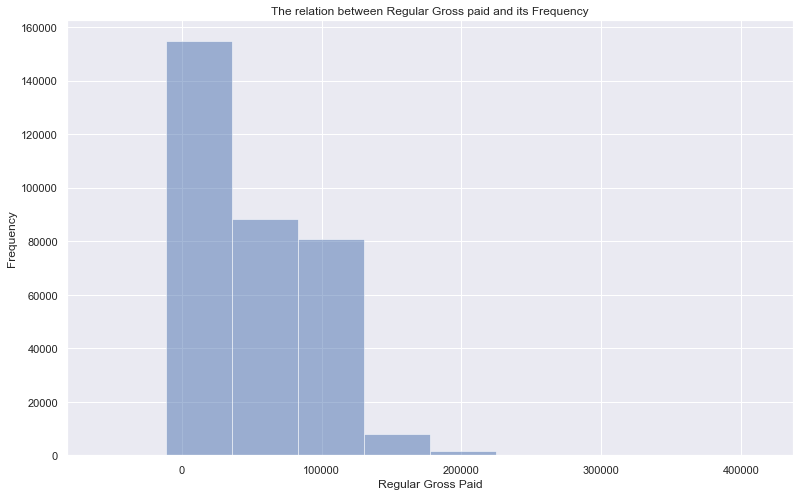

In [19]:
ax = df["Regular Gross Paid"].plot.hist(alpha=0.5,figsize=(13,8), title='The relation between Regular Gross paid and its Frequency')
ax.set_xlabel('Regular Gross Paid')
#

Text(0.5, 1.0, 'Box plot for regular gross paid')

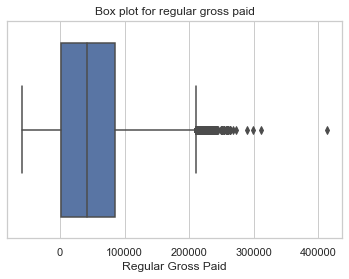

In [20]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")

ax = sns.boxplot(x=df["Regular Gross Paid"])
ax.set_title("Box plot for regular gross paid")

Text(0.5, 1.0, 'The Box plot for number of years working')

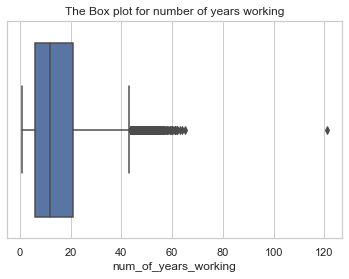

In [21]:
g = sns.boxplot(x=df["num_of_years_working"])
g.set_title("The Box plot for number of years working")

In [22]:
# Remove any  outliers from all key features 
Q1 = df['Regular Gross Paid'].quantile(0.25)
Q3 = df['Regular Gross Paid'].quantile(0.75)

IQR = Q3 - Q1
outliers_below = df['Regular Gross Paid'] < (Q1 - 1.5 * IQR)
outliers_above = df['Regular Gross Paid'] > (Q3 + 1.5 * IQR)
df = df[~(outliers_below | outliers_above)]
df.head()

,Agency Name,Work Location Borough,Regular Gross Paid,num_of_years_working,OT Hours,Base Salary,Regular Hours
2,DEPT OF HEALTH/MENTAL HYGIENE,BROOKLYN,132288.00,4,2115.25,508.80,2080.0
3,DEPT OF HEALTH/MENTAL HYGIENE,MANHATTAN,132288.00,12,2152.75,508.80,2080.0
4,DEPT OF HEALTH/MENTAL HYGIENE,QUEENS,132288.00,15,1876.25,508.80,2080.0
5,GUTTMAN COMMUNITY COLLEGE,MANHATTAN,122427.81,11,0.00,228000.00,980.0
6,NYC HOUSING AUTHORITY,BRONX,119469.25,28,2032.50,460.25,1820.0


Text(0.5, 1.0, 'The Box plot for number of years working')

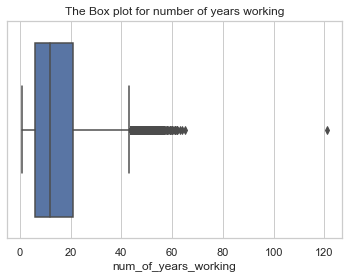

In [23]:
g = sns.boxplot(x=df["num_of_years_working"])
g.set_title("The Box plot for number of years working")


In [24]:
Q1 = df['num_of_years_working'].quantile(0.25)
Q3 = df['num_of_years_working'].quantile(0.75)

IQR = Q3 - Q1
outliers_below = df['num_of_years_working'] < (Q1 - 1.5 * IQR)
outliers_above = df['num_of_years_working'] > (Q3 + 1.5 * IQR)
df = df[~(outliers_below | outliers_above)]
df.head()

,Agency Name,Work Location Borough,Regular Gross Paid,num_of_years_working,OT Hours,Base Salary,Regular Hours
2,DEPT OF HEALTH/MENTAL HYGIENE,BROOKLYN,132288.00,4,2115.25,508.80,2080.0
3,DEPT OF HEALTH/MENTAL HYGIENE,MANHATTAN,132288.00,12,2152.75,508.80,2080.0
4,DEPT OF HEALTH/MENTAL HYGIENE,QUEENS,132288.00,15,1876.25,508.80,2080.0
5,GUTTMAN COMMUNITY COLLEGE,MANHATTAN,122427.81,11,0.00,228000.00,980.0
6,NYC HOUSING AUTHORITY,BRONX,119469.25,28,2032.50,460.25,1820.0


Text(0.5, 1.0, 'The Box plot for number of years working')

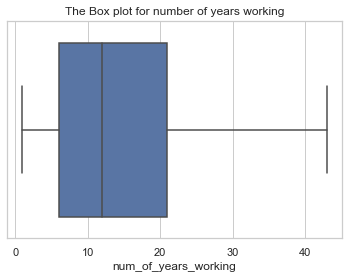

In [25]:
g = sns.boxplot(x=df["num_of_years_working"])
g.set_title("The Box plot for number of years working")

In [26]:
locations = df.groupby("Work Location Borough")["Regular Gross Paid"].agg(["mean", "max", "min"])
locations

,mean,max,min
Work Location Borough,,,
ALBANY,94159.889286,183860.13,41686.90
BRONX,57309.380853,210732.63,-12689.88
BROOKLYN,61090.974895,209408.82,-10775.47
DELAWARE,67182.976393,133902.16,11908.22
DUTCHESS,95364.027222,166038.35,17311.32
GREENE,79853.787143,130499.20,59871.94
MANHATTAN,41528.030673,210875.89,-58284.17
NASSAU,39328.570000,78834.41,0.00
ORANGE,57241.460000,57241.46,57241.46


In [27]:
# we can tell that above dataframe that some rows have inaccurate info(salary should always be positive)
df =  df[df["Regular Gross Paid"] > 10000]
df

,Agency Name,Work Location Borough,Regular Gross Paid,num_of_years_working,OT Hours,Base Salary,Regular Hours
2,DEPT OF HEALTH/MENTAL HYGIENE,BROOKLYN,132288.00,4,2115.25,508.80,2080.00
3,DEPT OF HEALTH/MENTAL HYGIENE,MANHATTAN,132288.00,12,2152.75,508.80,2080.00
4,DEPT OF HEALTH/MENTAL HYGIENE,QUEENS,132288.00,15,1876.25,508.80,2080.00
5,GUTTMAN COMMUNITY COLLEGE,MANHATTAN,122427.81,11,0.00,228000.00,980.00
6,NYC HOUSING AUTHORITY,BRONX,119469.25,28,2032.50,460.25,1820.00
...,...,...,...,...,...,...,...
332164,NYC HOUSING AUTHORITY,MANHATTAN,27783.78,22,0.00,44930.00,-1.25
332165,NYC HOUSING AUTHORITY,BROOKLYN,16875.41,3,0.00,32950.00,55.00
332166,NYC HOUSING AUTHORITY,BROOKLYN,16245.07,3,0.00,32950.00,36.57
332167,NYC HOUSING AUTHORITY,BRONX,12596.50,3,0.00,32950.00,-64.00


In [28]:
# find out if there is a Total other paid difference among all work boroughs
locations = df.groupby("Work Location Borough")["Regular Gross Paid"].agg(["mean", "max", "min"])
locations

,mean,max,min
Work Location Borough,,,
ALBANY,94159.889286,183860.13,41686.90
BRONX,64490.346302,210732.63,10010.34
BROOKLYN,66983.834713,209408.82,10005.96
DELAWARE,67182.976393,133902.16,11908.22
DUTCHESS,95364.027222,166038.35,17311.32
GREENE,79853.787143,130499.20,59871.94
MANHATTAN,72751.936333,210875.89,10001.71
NASSAU,44946.937143,78834.41,11696.22
ORANGE,57241.460000,57241.46,57241.46


Text(0, 0.5, 'The amount of payment $')

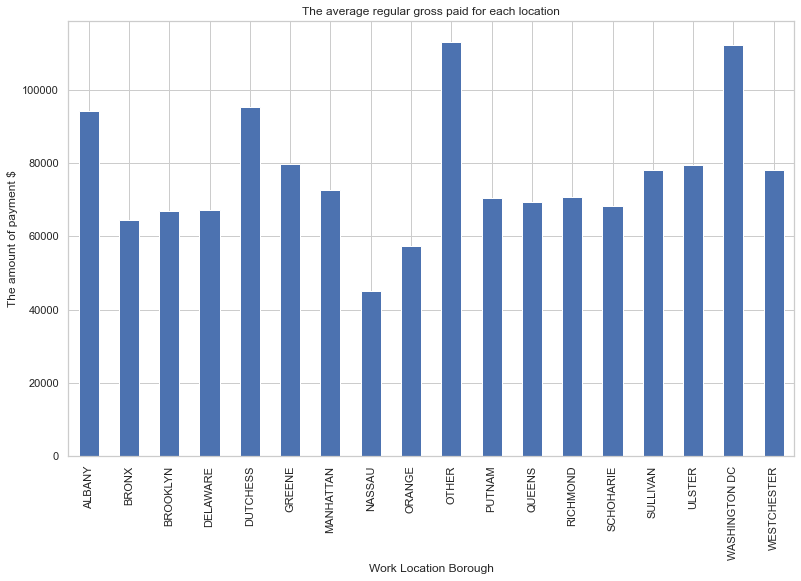

In [29]:
#washington DC and other these two areas have the highest mean regular gross paid, nassau county makes the least
locations["mean"].plot.bar(figsize=(13, 8))
plt.title("The average regular gross paid for each location")
plt.ylabel("The amount of payment $")

People who work in Washington DC or other havethe highest average regular gross pay.

In [30]:
# regular gross paid in nyc 5 boroughs
five_boroughs = df[df["Work Location Borough"].isin(["BRONX", "BROOKLYN", "MANHATTAN", "QUEENS", "OTHER"])]
five_boroughs.head()

,Agency Name,Work Location Borough,Regular Gross Paid,num_of_years_working,OT Hours,Base Salary,Regular Hours
2,DEPT OF HEALTH/MENTAL HYGIENE,BROOKLYN,132288.00,4,2115.25,508.80,2080.0
3,DEPT OF HEALTH/MENTAL HYGIENE,MANHATTAN,132288.00,12,2152.75,508.80,2080.0
4,DEPT OF HEALTH/MENTAL HYGIENE,QUEENS,132288.00,15,1876.25,508.80,2080.0
5,GUTTMAN COMMUNITY COLLEGE,MANHATTAN,122427.81,11,0.00,228000.00,980.0
6,NYC HOUSING AUTHORITY,BRONX,119469.25,28,2032.50,460.25,1820.0


In [31]:
five_boroughs.groupby("Work Location Borough")["Regular Gross Paid"].agg(["mean", "max", "min"])

,mean,max,min
Work Location Borough,,,
BRONX,64490.346302,210732.63,10010.34
BROOKLYN,66983.834713,209408.82,10005.96
MANHATTAN,72751.936333,210875.89,10001.71
OTHER,113130.056458,209476.08,10409.08
QUEENS,69469.676238,208686.86,10004.51


Text(0, 0.5, 'Gross Paid($)')

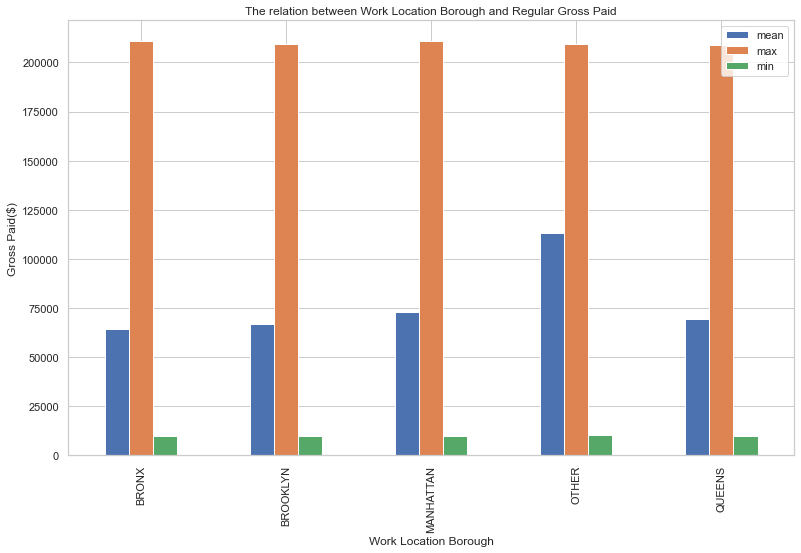

In [32]:
g = five_boroughs.groupby("Work Location Borough")["Regular Gross Paid"].agg(["mean", "max", "min"]).plot.bar(figsize=(13, 8))
g.set_title("The relation between Work Location Borough and Regular Gross Paid")
g.set_ylabel("Gross Paid($)")

In [33]:
#The reason why peoplw work outside of five boroughs, I assume, is because people work from home because of covid
work_Location_Borough = df["Work Location Borough"].value_counts().to_frame()
# total = work_Location_Borough.sum()
work_Location_Borough["percentage(%)"] = work_Location_Borough["Work Location Borough"] / len(df) * 100
work_Location_Borough

,Work Location Borough,percentage(%)
MANHATTAN,133275,62.040024
QUEENS,30692,14.287244
BROOKLYN,27114,12.621671
BRONX,14612,6.801942
RICHMOND,4540,2.113387
OTHER,3825,1.780552
WESTCHESTER,308,0.143375
ULSTER,202,0.094032
SULLIVAN,95,0.044223
DELAWARE,61,0.028396


calculate average, max and min salary for each dept

In [34]:
#list out all the agency names with descending mean max and min regular gross paid value
agencyNames = df.groupby("Agency Name")["Regular Gross Paid"].agg(["mean","max", "min"])
agencyNames.sort_values("mean", ascending=False)

,mean,max,min
Agency Name,,,
QUEENS COMMUNITY BOARD #14,137521.870000,137521.87,137521.87
OFFICE OF COLLECTIVE BARGAININ,133570.485556,198603.51,55167.34
PUBLIC ADMINISTRATOR-RICHMOND,130760.913333,186673.01,81160.97
BROOKLYN COMMUNITY BOARD #10,128415.540000,128415.54,128415.54
OFFICE OF THE ACTUARY,113231.902381,208176.14,50651.03
...,...,...,...
DEPT OF ED PER DIEM TEACHERS,25173.560256,106783.07,10006.04
PERSONNEL MONITORS,23917.666667,27688.00,11304.00
DEPT OF ED HRLY SUPPORT STAFF,20630.291598,52919.68,10026.64


OFFICE OF COLLECTIVE BARGAININ has the highest average regular gross pay

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'The relationship between Number of Year and Gross paid')

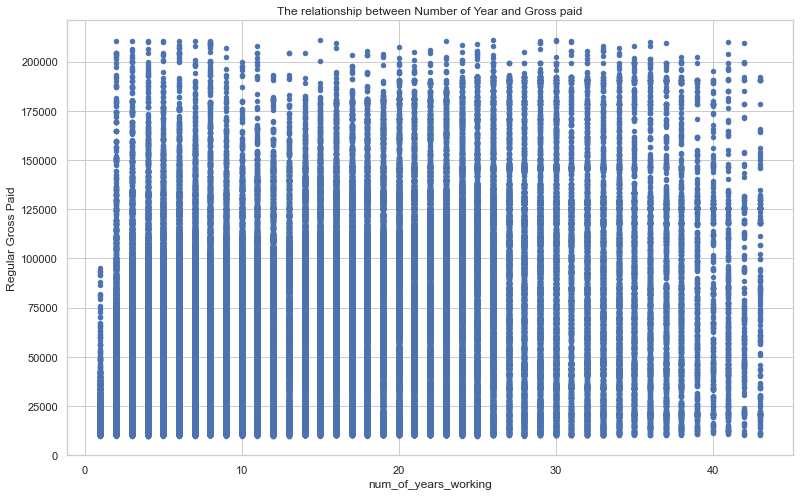

In [35]:
# scatter plot for NumOfYears and Regular Gross Paid
df.plot.scatter(x="num_of_years_working", y="Regular Gross Paid", figsize=(13, 8))
plt.title("The relationship between Number of Year and Gross paid")

In [36]:
df.corr()
# they have low correlation

,Regular Gross Paid,num_of_years_working,OT Hours,Base Salary,Regular Hours
Regular Gross Paid,1.000000,0.373831,0.087337,0.851503,0.033359
num_of_years_working,0.373831,1.000000,-0.021071,0.349437,-0.174434
OT Hours,0.087337,-0.021071,1.000000,0.016605,0.500353
Base Salary,0.851503,0.349437,0.016605,1.000000,-0.042746
Regular Hours,0.033359,-0.174434,0.500353,-0.042746,1.000000


In [37]:
#filter out the num of work years that is greater than 3
new_hires = df[df["num_of_years_working"] <= 3]
new_hires

,Agency Name,Work Location Borough,Regular Gross Paid,num_of_years_working,OT Hours,Base Salary,Regular Hours
7,DEPT OF HEALTH/MENTAL HYGIENE,BROOKLYN,134832.62,3,1755.25,508.80,2080.00
11,DEPARTMENT OF CORRECTION,QUEENS,132288.00,2,1713.25,508.80,2080.00
48,DEPT OF HEALTH/MENTAL HYGIENE,MANHATTAN,132288.00,3,1208.75,508.80,2080.00
50,NYC HOUSING AUTHORITY,BRONX,97141.89,3,2064.00,375.06,1820.00
102,NYC HOUSING AUTHORITY,BRONX,97133.39,3,1814.00,375.06,1820.00
...,...,...,...,...,...,...,...
266446,NYC HOUSING AUTHORITY,MANHATTAN,11856.11,2,0.00,32950.00,36.22
332165,NYC HOUSING AUTHORITY,BROOKLYN,16875.41,3,0.00,32950.00,55.00
332166,NYC HOUSING AUTHORITY,BROOKLYN,16245.07,3,0.00,32950.00,36.57
332167,NYC HOUSING AUTHORITY,BRONX,12596.50,3,0.00,32950.00,-64.00


In [38]:
#list out all the agency names with descending mean max and min regular gross paid value for new hires
new_hires.groupby("Agency Name")["Regular Gross Paid"].agg(["mean","max", "min"]).reset_index().sort_values(["mean", "max", "min"], ascending=[False, False, False])

,Agency Name,mean,max,min
99,PUBLIC ADMINISTRATOR-RICHMOND,155560.885000,186673.01,124448.76
86,OFFICE OF COLLECTIVE BARGAININ,111075.560000,129634.07,92517.05
64,FINANCIAL INFO SVCS AGENCY,99569.764615,167251.31,14646.45
2,BOARD OF CORRECTION,97901.912500,203425.89,23168.67
20,CIVIL SERVICE COMMISSION,90139.050000,138420.10,41858.00
...,...,...,...,...
93,PERSONNEL MONITORS,18928.000000,26552.00,11304.00
10,BRONX COMMUNITY BOARD #5,18096.360000,18096.36,18096.36
44,DEPT OF ED HRLY SUPPORT STAFF,17610.805798,33561.46,10048.47
74,MANHATTAN COMMUNITY BOARD #10,15373.660000,15373.66,15373.66


In [39]:
new_hires.groupby(["Agency Name", "Work Location Borough"])["Regular Gross Paid"].agg(["mean","max", "min","size"]).sort_values(["mean", "max", "min"], ascending=[False, False, False])

,,mean,max,min,size
Agency Name,Work Location Borough,,,,
OFFICE OF THE MAYOR,WASHINGTON DC,177688.350000,177688.35,177688.35,1
PUBLIC ADMINISTRATOR-RICHMOND,RICHMOND,155560.885000,186673.01,124448.76,2
OFFICE OF COLLECTIVE BARGAININ,MANHATTAN,111075.560000,129634.07,92517.05,2
CITY COUNCIL,ALBANY,102699.435000,128387.72,77011.15,2
FINANCIAL INFO SVCS AGENCY,MANHATTAN,99569.764615,167251.31,14646.45,13
...,...,...,...,...,...
DEPT OF ED HRLY SUPPORT STAFF,MANHATTAN,17610.805798,33561.46,10048.47,476
MANHATTAN COMMUNITY BOARD #10,MANHATTAN,15373.660000,15373.66,15373.66,1
COMMUNITY COLLEGE (BRONX),BRONX,15204.085429,36566.64,10071.60,35


In [40]:
# how much does an avenrage entry-level job make in engineering dept
enginerringDept = new_hires[new_hires["Agency Name"] == "DEPT OF INFO TECH & TELECOMM"]
enginerringDept.head()

,Agency Name,Work Location Borough,Regular Gross Paid,num_of_years_working,OT Hours,Base Salary,Regular Hours
1319,DEPT OF INFO TECH & TELECOMM,MANHATTAN,165197.84,3,361.5,165664.0,1820.0
2303,DEPT OF INFO TECH & TELECOMM,BROOKLYN,204422.92,2,0.0,205000.0,1820.0
2626,DEPT OF INFO TECH & TELECOMM,BROOKLYN,201160.05,2,0.0,229948.0,1820.0
2857,DEPT OF INFO TECH & TELECOMM,BROOKLYN,199437.01,2,0.0,200000.0,1820.0
3922,DEPT OF INFO TECH & TELECOMM,MANHATTAN,179301.17,3,76.0,180000.0,1820.0


In [41]:
enginerringDept["Regular Gross Paid"].mean()

72714.05961832053

In [42]:
enginerringDept.groupby("Work Location Borough")["Regular Gross Paid"].mean().to_frame()

,Regular Gross Paid
Work Location Borough,
BROOKLYN,92668.444353
MANHATTAN,63131.445480


In [43]:
df.head()

,Agency Name,Work Location Borough,Regular Gross Paid,num_of_years_working,OT Hours,Base Salary,Regular Hours
2,DEPT OF HEALTH/MENTAL HYGIENE,BROOKLYN,132288.00,4,2115.25,508.80,2080.0
3,DEPT OF HEALTH/MENTAL HYGIENE,MANHATTAN,132288.00,12,2152.75,508.80,2080.0
4,DEPT OF HEALTH/MENTAL HYGIENE,QUEENS,132288.00,15,1876.25,508.80,2080.0
5,GUTTMAN COMMUNITY COLLEGE,MANHATTAN,122427.81,11,0.00,228000.00,980.0
6,NYC HOUSING AUTHORITY,BRONX,119469.25,28,2032.50,460.25,1820.0


<AxesSubplot:>

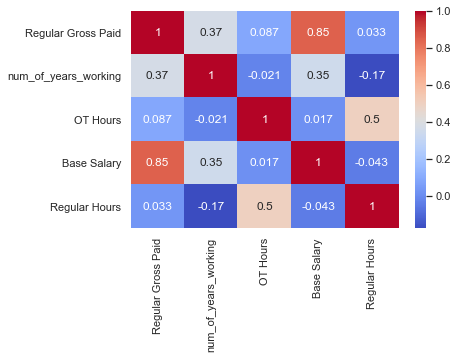

In [44]:
#The correlation between regular gross paid and numOfYears
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<AxesSubplot:>

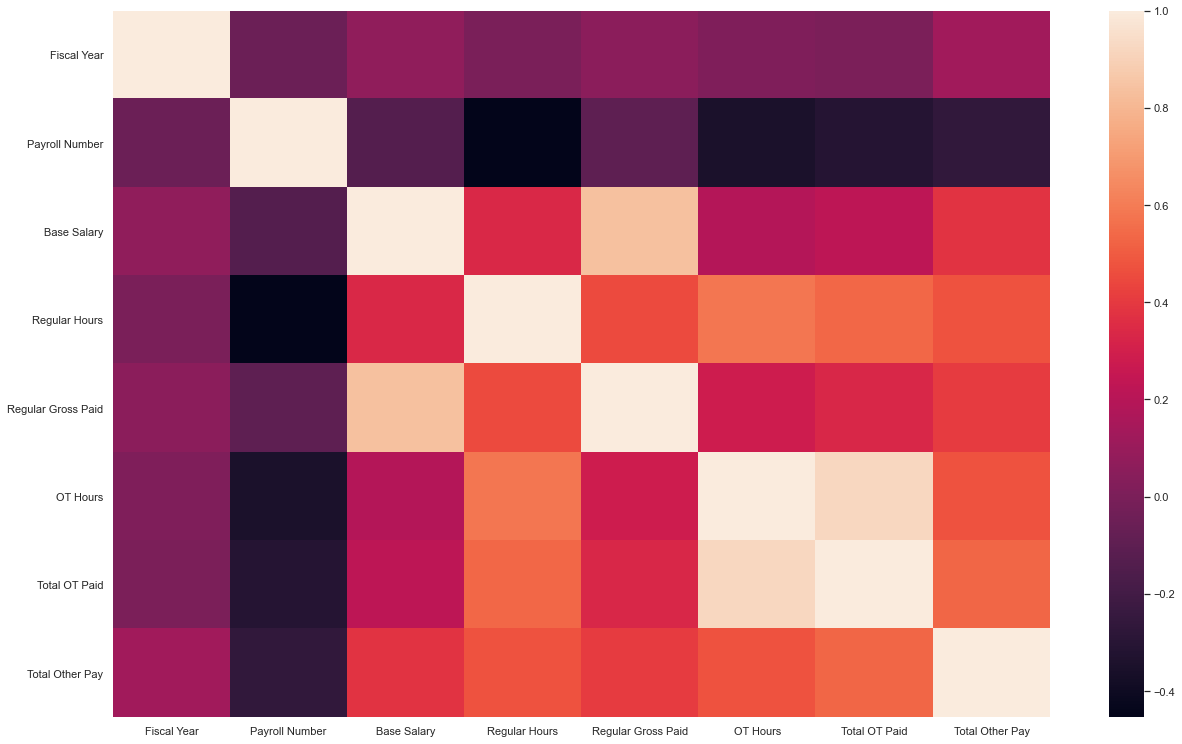

In [45]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8
original_df.corr()
fig, ax = plt.subplots(figsize=(21,13))  
sns.heatmap(original_df.corr())

Text(0.5, 1.0, 'The Heatmap between any two volumns')

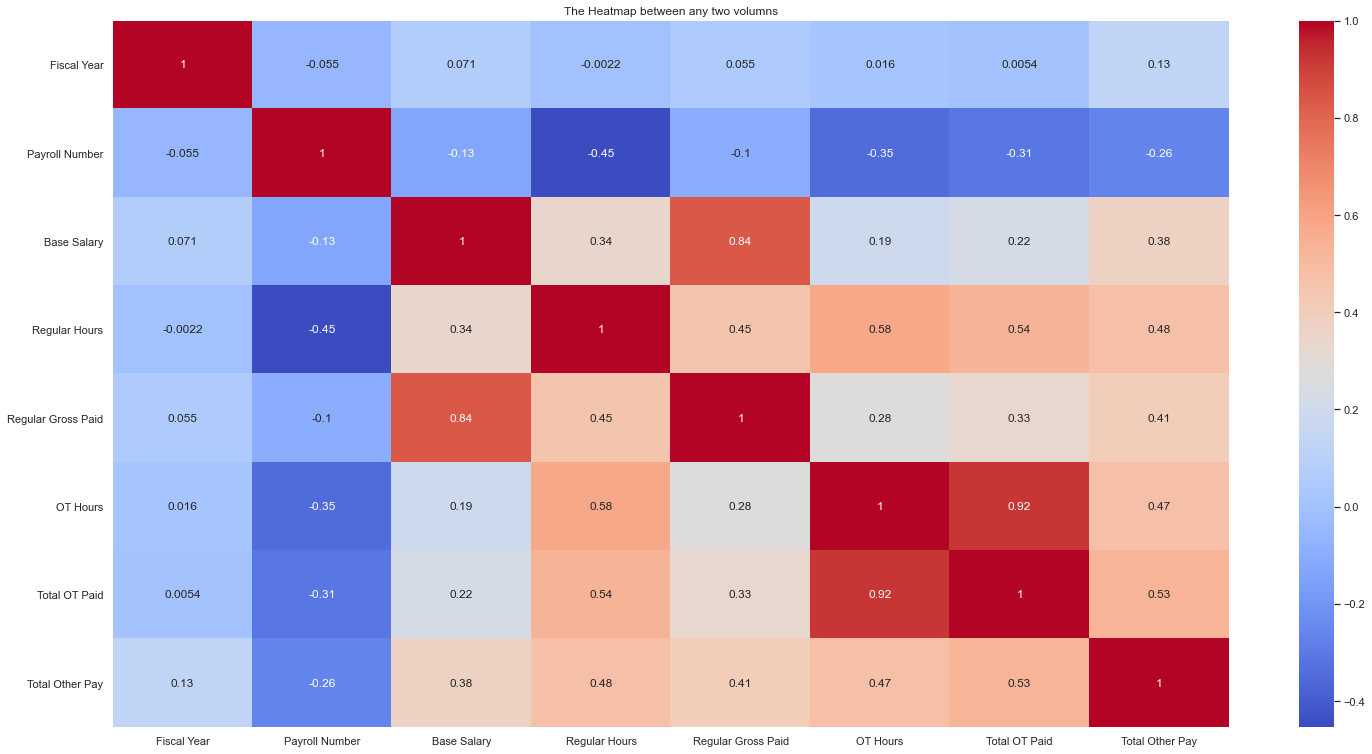

In [46]:
#Found that base salary has a strong correlation with regular gross paid
fig, ax = plt.subplots(figsize=(25,13))  
g = sns.heatmap(original_df.corr(), annot=True, cmap='coolwarm')
g.set_title("The Heatmap between any two volumns")

In [47]:
OT_Hours = original_df.groupby("Agency Name")["OT Hours"].mean().to_frame("Average OT Hours")
OT_Hours["Average OT Hours"].sort_values(ascending=False).to_frame()
#Fire dept has the most OT Hours

,Average OT Hours
Agency Name,
FIRE DEPARTMENT,334.861689
DEPARTMENT OF CORRECTION,283.818520
BOARD OF ELECTION,263.782936
POLICE DEPARTMENT,208.438459
DEPARTMENT OF SANITATION,205.470525
...,...
MANHATTAN COMMUNITY BOARD #11,0.000000
MANHATTAN COMMUNITY BOARD #10,0.000000
MANHATTAN COMMUNITY BOARD #1,0.000000


In [48]:
df.head()

,Agency Name,Work Location Borough,Regular Gross Paid,num_of_years_working,OT Hours,Base Salary,Regular Hours
2,DEPT OF HEALTH/MENTAL HYGIENE,BROOKLYN,132288.00,4,2115.25,508.80,2080.0
3,DEPT OF HEALTH/MENTAL HYGIENE,MANHATTAN,132288.00,12,2152.75,508.80,2080.0
4,DEPT OF HEALTH/MENTAL HYGIENE,QUEENS,132288.00,15,1876.25,508.80,2080.0
5,GUTTMAN COMMUNITY COLLEGE,MANHATTAN,122427.81,11,0.00,228000.00,980.0
6,NYC HOUSING AUTHORITY,BRONX,119469.25,28,2032.50,460.25,1820.0


# Model training and prediction

In [49]:
key_features = ["num_of_years_working", "OT Hours", "Base Salary", "Regular Hours", "Regular Gross Paid"]
df = df[key_features]
df.head()

,num_of_years_working,OT Hours,Base Salary,Regular Hours,Regular Gross Paid
2,4,2115.25,508.80,2080.0,132288.00
3,12,2152.75,508.80,2080.0,132288.00
4,15,1876.25,508.80,2080.0,132288.00
5,11,0.00,228000.00,980.0,122427.81
6,28,2032.50,460.25,1820.0,119469.25


In [50]:
X = df.drop("Regular Gross Paid", axis = 1)
y = df[["Regular Gross Paid"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42 )

In [51]:
print(X_train.shape, X_test.shape)

(171856, 4) (42965, 4)


In [52]:
model1= LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [53]:
print(model1.intercept_)
model1.coef_


[11875.30973136]


array([[392.94101707,   6.79826151,   0.71995113,   2.36518672]])

In [54]:
y_pred = model1.predict(X_test)
MSE1= mean_squared_error(y_test, y_pred)
MSE1

328194972.87822175

In [55]:
df = df.rename(columns = {'Regular Gross Paid': "Regular_Gross_Paid", "OT Hours": "OT_Hours", "Base Salary": "Base_Salary", "Regular Hours": "Regular_Hours"} )
df.head()

,num_of_years_working,OT_Hours,Base_Salary,Regular_Hours,Regular_Gross_Paid
2,4,2115.25,508.80,2080.0,132288.00
3,12,2152.75,508.80,2080.0,132288.00
4,15,1876.25,508.80,2080.0,132288.00
5,11,0.00,228000.00,980.0,122427.81
6,28,2032.50,460.25,1820.0,119469.25


In [56]:
lm = smf.ols("Regular_Gross_Paid ~ num_of_years_working + OT_Hours + Base_Salary + Regular_Hours", data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Regular_Gross_Paid   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                 1.531e+05
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:25:57   Log-Likelihood:            -2.4109e+06
No. Observations:              214821   AIC:                         4.822e+06
Df Residuals:                  214816   BIC:                         4.822e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.187e+04    102.874    115.352      0.000    1.17e+04    1.21e+04
num_of_years_working   394.9783      4.722     83.644      0.000     385.723     404.234
OT_Hours                 6.8907      0.200     34.489      0.000       6.499       7.282
Base_Salary              0.7194      0.001    697.388      0.000       0.717       0.721
Regular_Hours            2.3813      0.048     49.319      0.000       2.287       2.476
==============================================================================
Omnibus:                    51042.122   Durbin-Watson:                   1.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1291155.731
Skew:                           0.566   Prob(JB):                         0.00
Kurtosis:                      14.957   Cond. No.                     2.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

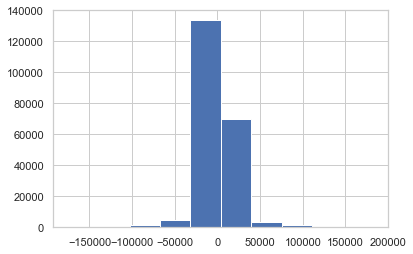

In [57]:
lm.resid.hist()

In [58]:
model2 = KNeighborsRegressor(n_neighbors=3)
model2.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [59]:
y_pred_knn = model2.predict(X_test)
MSE_KNN = mean_squared_error(y_test, y_pred_knn)
MSE_KNN

59821572.58221156

In [60]:
model2 = KNeighborsRegressor(n_neighbors=5)
model2.fit(X_train, y_train)
y_pred_knn = model2.predict(X_test)
MSE_KNN = mean_squared_error(y_test, y_pred_knn)
MSE_KNN

59262692.54158224

In [61]:
model2 = KNeighborsRegressor(n_neighbors=10)
model2.fit(X_train, y_train)
y_pred_knn = model2.predict(X_test)
MSE_KNN = mean_squared_error(y_test, y_pred_knn)
MSE_KNN

62808325.54619111

In [62]:
# PolynomialRegressor
poly = PolynomialFeatures(degree=3)
x_multi_features = poly.fit_transform(X_train)
model_poly = LinearRegression()
model_poly.fit(x_multi_features, y_train)


LinearRegression()

In [63]:
x_test_multi_features = poly.fit_transform(X_test)
y_pred_poly = model_poly.predict(x_test_multi_features)
MSE_Poly = mean_squared_error(y_test, y_pred_poly)
MSE_Poly

151229920.46395022

In [64]:
poly = PolynomialFeatures(degree=5)
x_multi_features = poly.fit_transform(X_train)
model_poly = LinearRegression()
model_poly.fit(x_multi_features, y_train)
x_test_multi_features = poly.fit_transform(X_test)
y_pred_poly = model_poly.predict(x_test_multi_features)
MSE_Poly = mean_squared_error(y_test, y_pred_poly)
MSE_Poly

155251201.4600529

In [65]:
poly = PolynomialFeatures(degree=10)
x_multi_features = poly.fit_transform(X_train)
model_poly = LinearRegression()
model_poly.fit(x_multi_features, y_train)
x_test_multi_features = poly.fit_transform(X_test)
y_pred_poly = model_poly.predict(x_test_multi_features)
MSE_Poly = mean_squared_error(y_test, y_pred_poly)
MSE_Poly

557508451.4784433